In [68]:
import re

import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"
pio.templates.default = "plotly_white"

from pathlib import Path

In [69]:
BASEDIR = "../output"
RUN_PREFIX = ("20240118_123739")

In [70]:
def parse_filename(filename):
    regex = re.compile(r"[\d_]+_mu([\d.]+)_gamma([\d.]*\d+).*")
    matches = re.search(regex, filename)
    return float(matches[1]), float(matches[2])

In [71]:
def read_runs(prefix, basedir):
    files = list(map(str, Path(BASEDIR).glob(prefix + "*")))
    runs = []
    for file in files:
        mu, gamma = parse_filename(file)
        df = pd.read_csv(file)
        df["mu"] = mu
        df["gamma"] = gamma
        runs.append(df)
    return runs

In [72]:
runs = read_runs(RUN_PREFIX, BASEDIR)
runs = pd.concat(runs)
runs.head()

,round,client,stage,variable,value,mu,gamma
0,1,5,train,loss,1.924390,0.1,0.1
1,1,5,test,loss,2.097952,0.1,0.1
2,1,5,test,accuracy,1.000000,0.1,0.1
3,1,7,train,loss,2.199862,0.1,0.1
4,1,7,test,loss,2.084908,0.1,0.1


In [73]:
round_averages = runs.drop(columns="client")\
    .groupby(["round", "stage", "variable", "mu", "gamma"])\
    .mean()\
    .reset_index()

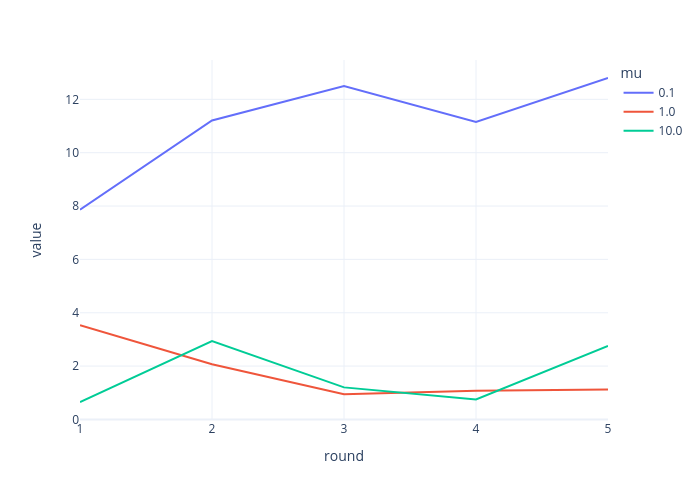

In [75]:
df = round_averages.query("gamma == 0.1 and stage == 'test' and variable == 'loss'")
px.line(df, x="round", y="value", color="mu")